In [54]:
# Data vizualisation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.decomposition import PCA

# metrics
from sklearn import metrics

# Classification
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

# Features selection 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif, f_classif, RFE

# Resampling 
from sklearn.utils import resample

In [2]:
data_pima = pd.read_csv('./pima-diabetes.csv')
data_pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


We then proved that we have no missing value in our dataset, we will now proceed to the analysis of the data we have

In [4]:
data_pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data_pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data visualization

Text(0.5, 1.0, 'Data distribution')

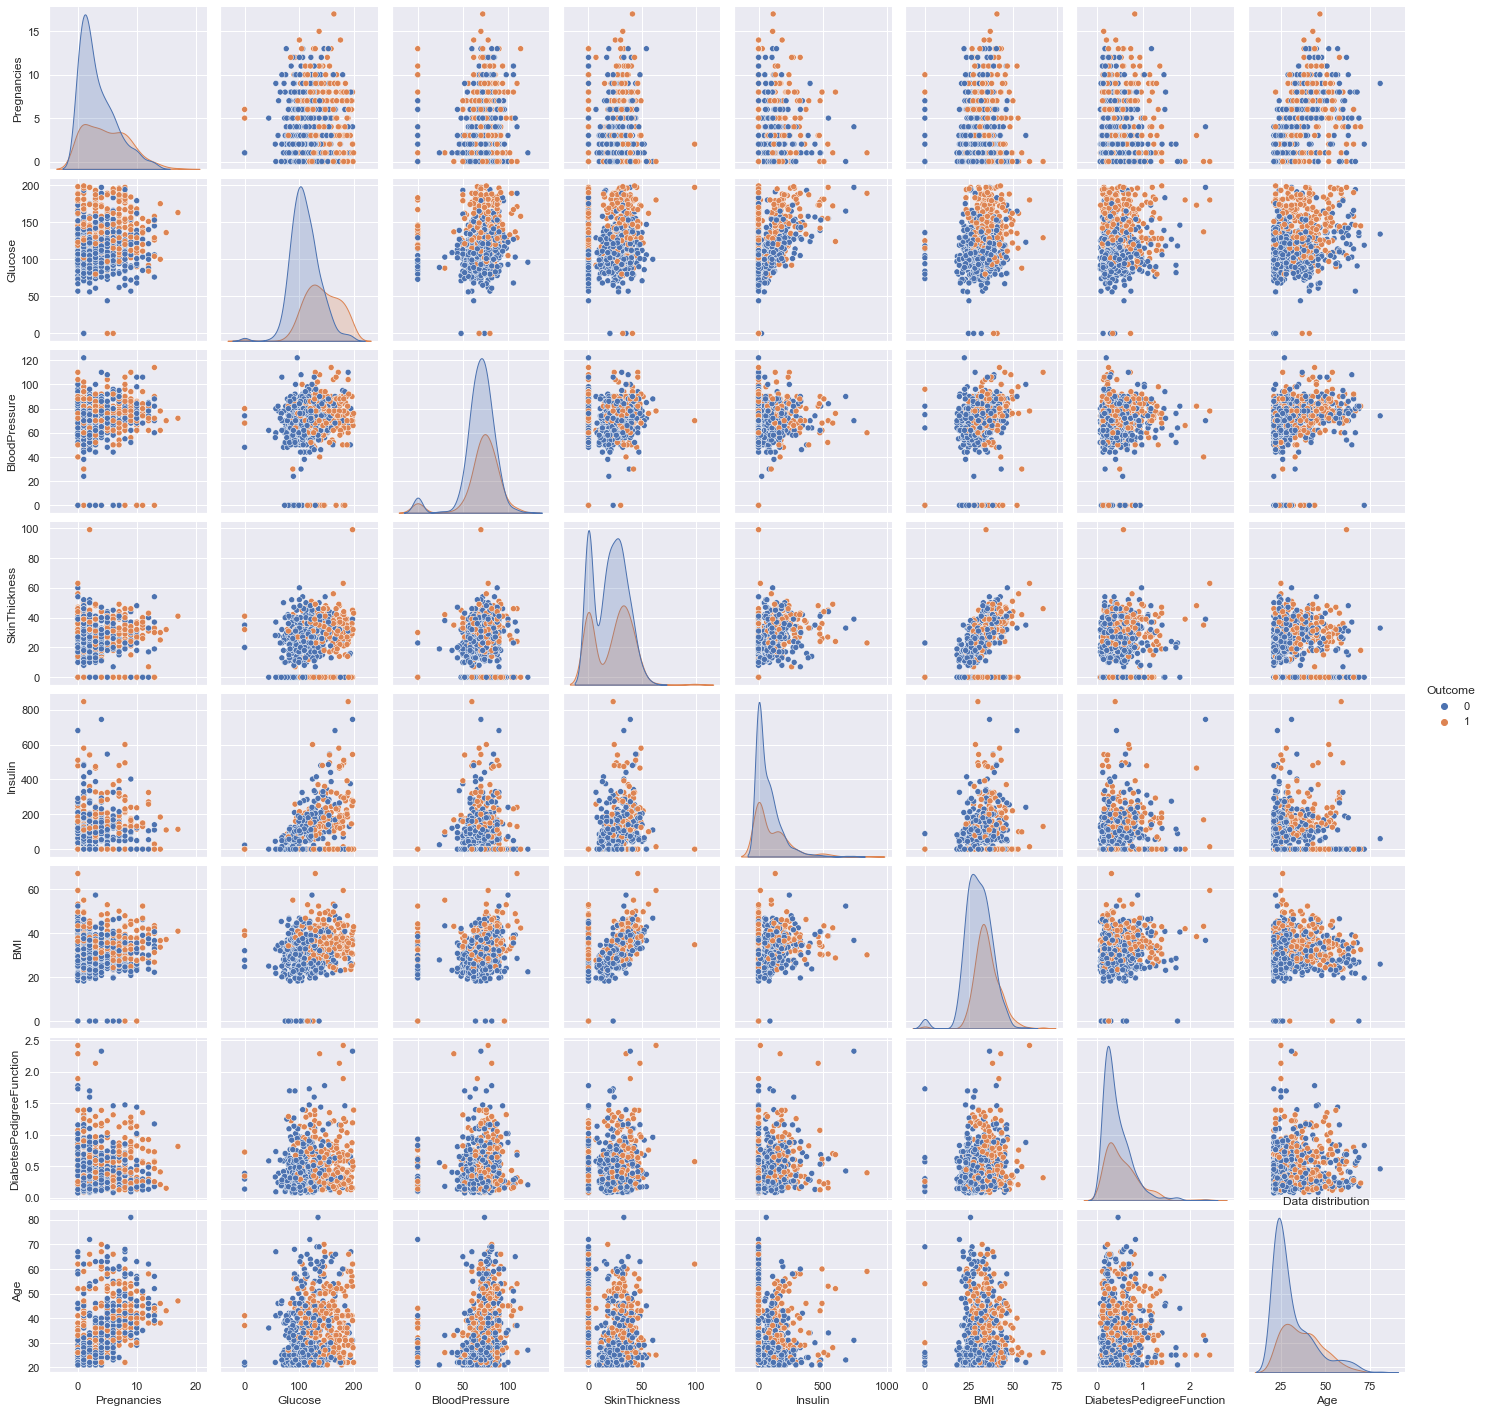

In [6]:
sns.set_theme()
sns.pairplot(data_pima,hue='Outcome')
plt.title('Data distribution')

We can see that the distribution we have makes the classification relatively complicated, since the distributions of the two categories are quite similar

Text(0.5, 1.0, 'Data correlation matrix')

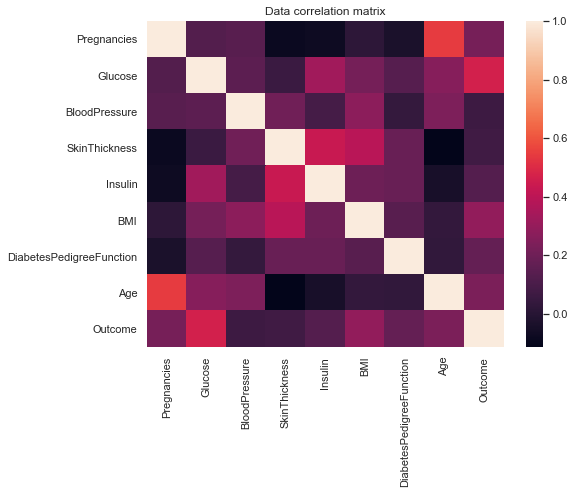

In [7]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8,6))
sns.heatmap(data_pima.corr())
plt.title("Data correlation matrix")

We see the distribution of each of our variables

Text(0.5, 1.0, 'Age')

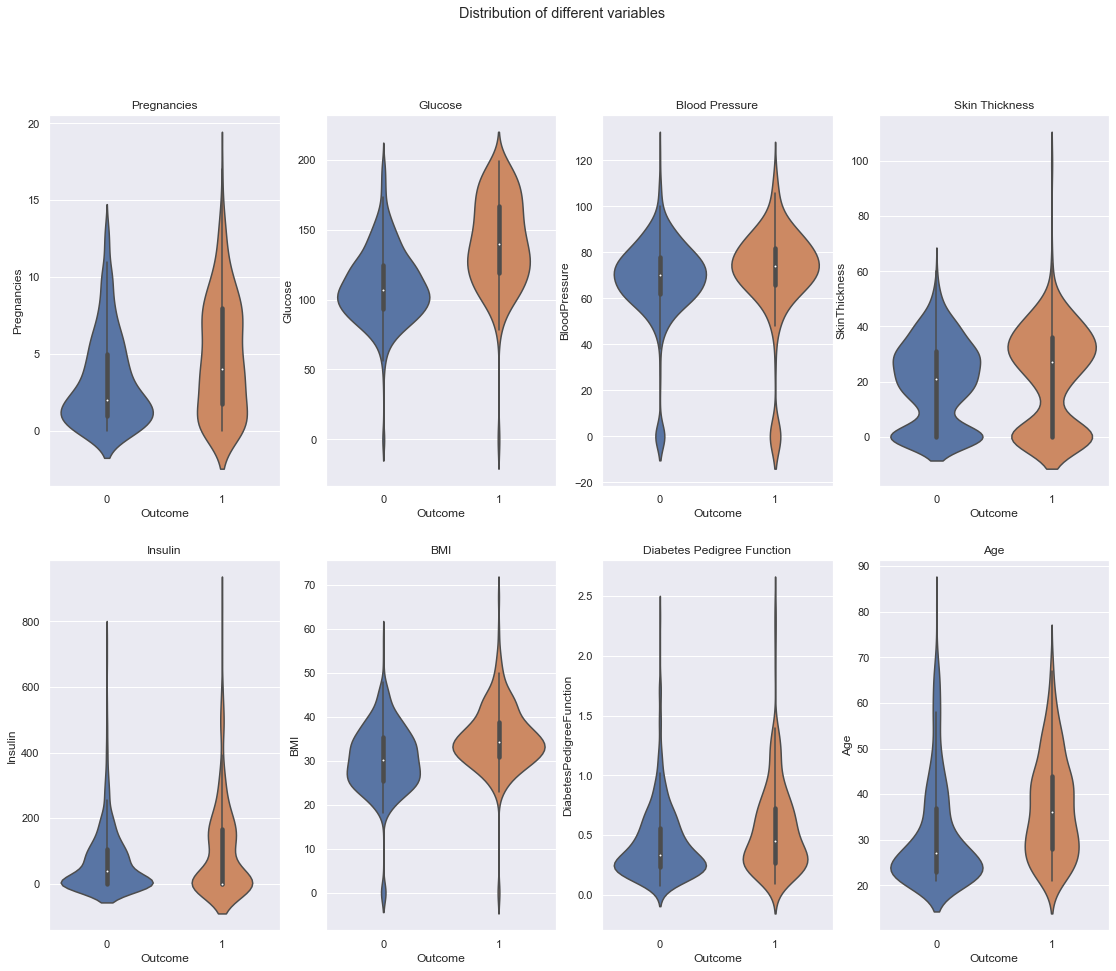

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(19,15),)
fig.suptitle('Distribution of different variables')

sns.violinplot(ax=axes[0, 0],data=data_pima ,x='Outcome', y='Pregnancies')
axes[0,0].set_title('Pregnancies')

sns.violinplot(ax=axes[0, 1],data=data_pima ,x='Outcome', y='Glucose')
axes[0,1].set_title('Glucose')

sns.violinplot(ax=axes[0, 2],data=data_pima ,x='Outcome', y='BloodPressure')
axes[0,2].set_title('Blood Pressure')

sns.violinplot(ax=axes[0, 3],data=data_pima ,x='Outcome', y='SkinThickness')
axes[0,3].set_title('Skin Thickness')

sns.violinplot(ax=axes[1, 0],data=data_pima ,x='Outcome', y='Insulin')
axes[1,0].set_title('Insulin')

sns.violinplot(ax=axes[1, 1],data=data_pima ,x='Outcome', y='BMI')
axes[1,1].set_title('BMI')

sns.violinplot(ax=axes[1, 2],data=data_pima ,x='Outcome', y='DiabetesPedigreeFunction')
axes[1,2].set_title('Diabetes Pedigree Function')

sns.violinplot(ax=axes[1, 3],data=data_pima ,x='Outcome', y='Age')
axes[1,3].set_title('Age')

We start the classification first without normalization, and by trying algorithms invariant to the normalization of the data (Decision tree, Random Forest...)

In [9]:
features_pima = data_pima.copy()
etiq = features_pima['Outcome']
features_pima.drop(['Outcome'], inplace=True, axis = 1)

In [10]:
fv_train, fv_test, etiq_train, etiq_test = train_test_split(features_pima, etiq, test_size=0.3,random_state=23)

## Random Forest

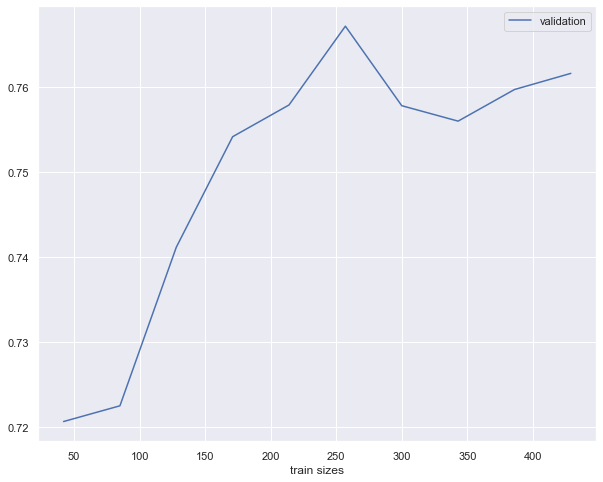

In [15]:
forrest = RandomForestClassifier(n_estimators = 700, max_features = 'sqrt', criterion = 'entropy', class_weight='balanced', random_state = 10).fit(fv_train,etiq_train)

N, train_score, val_score = learning_curve(forrest, fv_train, etiq_train, train_sizes=np.linspace(0.1, 1.0, 10), cv = 5)
plt.figure(figsize=(10,8))
# plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train sizes')
plt.legend()

In [16]:
yforrest = forrest.predict(fv_test)
print(metrics.classification_report(etiq_test,yforrest))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       148
           1       0.69      0.64      0.66        83

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.76      0.77      0.76       231



In [17]:
print("Accuracy : ",metrics.accuracy_score(etiq_test, yforrest))
print("F1-score : ",metrics.f1_score(etiq_test, yforrest, average='macro'))

Accuracy :  0.7662337662337663
F1-score :  0.7418460264900664


Text(0.5, 1.0, 'Confusion matrix Random Forest')

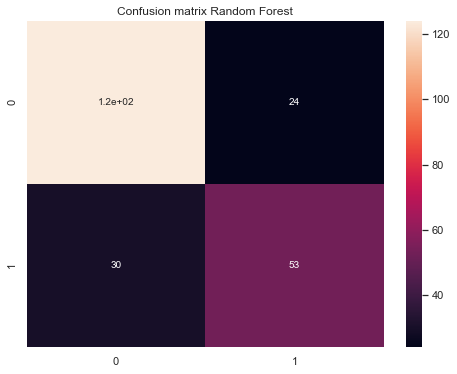

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yforrest), annot=True, annot_kws={"size": 10})
plt.title("Confusion matrix Random Forest")

## Extremely randomized tree

In [27]:
extra = ExtraTreesClassifier(n_estimators=700, criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0).fit(fv_train,etiq_train)

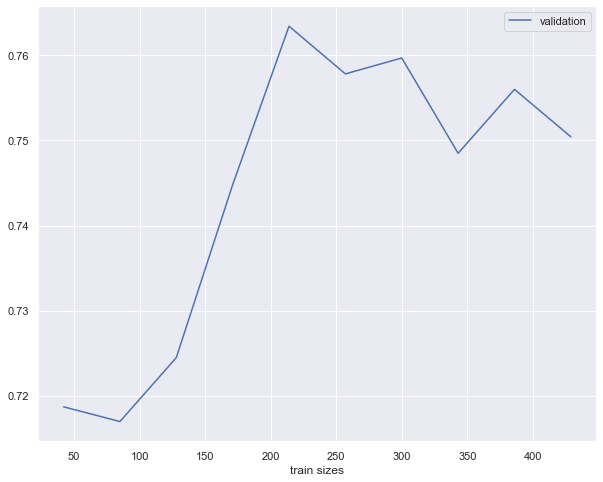

In [28]:
N, train_score, val_score = learning_curve(extra, fv_train, etiq_train, train_sizes=np.linspace(0.1, 1.0, 10), cv = 5)
plt.figure(figsize=(10,8))
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train sizes')
plt.legend()

In [29]:
yextra = extra.predict(fv_test)
print(metrics.classification_report(etiq_test,yextra))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       148
           1       0.70      0.60      0.65        83

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.76      0.77      0.76       231



In [30]:
print("Accuracy : ",metrics.accuracy_score(etiq_test, yextra))
print("F1-score : ",metrics.f1_score(etiq_test, yextra, average='macro'))

Accuracy :  0.7662337662337663
F1-score :  0.737012987012987


Text(0.5, 1.0, 'Confusion matrix Extremely randomized tree')

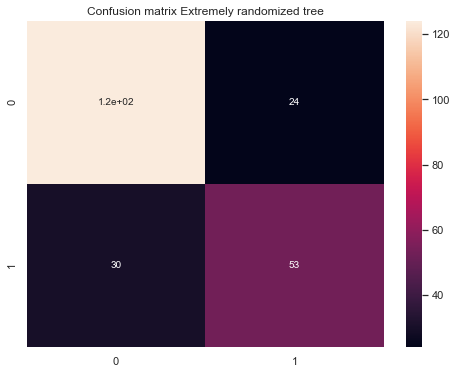

In [31]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yforrest), annot=True, annot_kws={"size": 10})
plt.title("Confusion matrix Extremely randomized tree")

## Adaboost

              precision    recall  f1-score   support

           0       0.76      0.85      0.81       148
           1       0.67      0.53      0.59        83

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231

Accuracy :  0.7359307359307359
F1-score:  0.6978579239659497


Text(0.5, 1.0, 'Confusion matrix Adaboost')

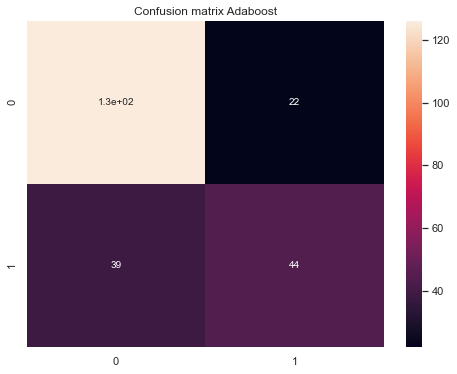

In [32]:
ada = AdaBoostClassifier(base_estimator=None, n_estimators=350, learning_rate=0.15, algorithm='SAMME.R', random_state=0).fit(fv_train,etiq_train)
yada = ada.predict(fv_test)
print(metrics.classification_report(etiq_test,yada))
print("Accuracy : ",metrics.accuracy_score(etiq_test, yada))
print("F1-score: ",metrics.f1_score(etiq_test, yada, average='macro'))
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yada), annot=True, annot_kws={"size": 10})
plt.title("Confusion matrix Adaboost")

## LGBM

In [48]:
lightmodel = LGBMClassifier(boosting_type='dart', num_leaves=70, max_depth=- 1, learning_rate=0.01, n_estimators=700, min_child_samples=20, random_state=15, importance_type='split').fit(fv_train,etiq_train)
ygbm = lightmodel.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, ygbm))
print("F1-score : ",metrics.f1_score(etiq_test, ygbm, average='macro'))

Accuracy :  0.7489177489177489
F1-score :  0.7243209876543211


Text(0.5, 1.0, 'Confusion matrix LGBM')

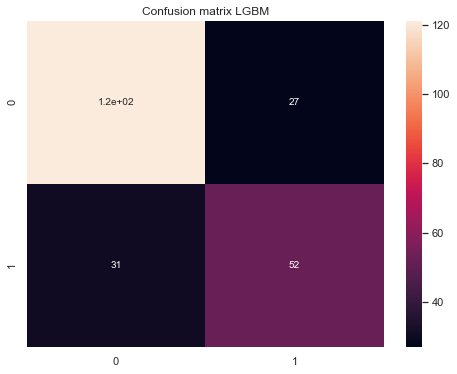

In [49]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, ygbm), annot=True, annot_kws={"size": 10})
plt.title("Confusion matrix LGBM")

## Naive Bayes

In [56]:
gaussNaive = GaussianNB().fit(fv_train,etiq_train)
ygaussNaive = gaussNaive.predict(fv_test)
print("Taux de précision lors des tests : ",metrics.accuracy_score(etiq_test, ygaussNaive))
print("F1-score : ",metrics.f1_score(etiq_test, ygaussNaive, average='macro'))

Taux de précision lors des tests :  0.7575757575757576
F1-score :  0.7353085611393027


Text(0.5, 1.0, 'Confusion matrix Naive Bayes')

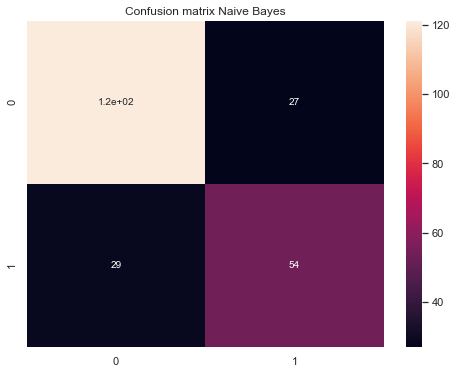

In [57]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, ygaussNaive), annot=True, annot_kws={"size": 10})
plt.title("Confusion matrix Naive Bayes")

## KNN

Accuracy :  0.7532467532467533
F1-score :  0.7196184067630587
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       148
           1       0.69      0.57      0.62        83

    accuracy                           0.75       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



Text(0.5, 1.0, 'Confusion matrix KNN')

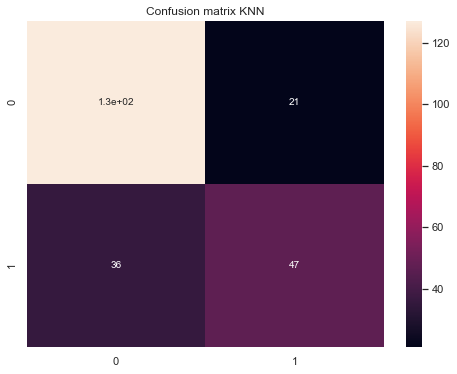

In [58]:
parameters = {'n_neighbors':np.arange(1,20,1), 'p' : np.arange(1,3,1)}
knn=KNeighborsClassifier()
clf = GridSearchCV(knn, parameters)
clf.fit(fv_train,etiq_train)
knn=KNeighborsClassifier(**clf.best_params_)
knn.fit(fv_train,etiq_train)

yknn=knn.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yknn))
print("F1-score : ", metrics.f1_score(etiq_test, yknn, average='macro'))
print(metrics.classification_report(etiq_test, yknn))

plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yknn), annot=True, annot_kws={"size": 10})
plt.title('Confusion matrix KNN')

## SVM

Accuracy :  0.7575757575757576
F1-score :  0.7153169014084506
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       148
           1       0.73      0.52      0.61        83

    accuracy                           0.76       231
   macro avg       0.75      0.70      0.72       231
weighted avg       0.75      0.76      0.75       231



Text(0.5, 1.0, 'Confusion matrix SVM')

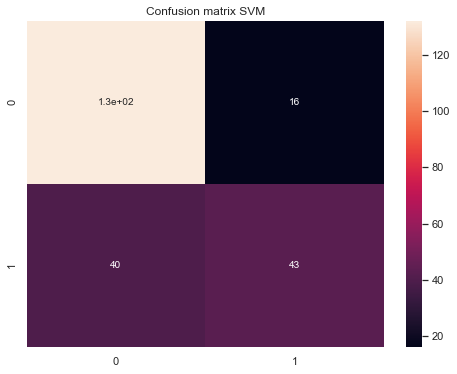

In [60]:
parameters = {'degree':np.arange(1,20,1)}
svm=SVC(gamma='scale', class_weight='balanced')
clf = GridSearchCV(svm, parameters)
clf.fit(fv_train,etiq_train)
svm=SVC(**clf.best_params_)
svm.fit(fv_train,etiq_train)
ysvm=svm.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, ysvm))
print("F1-score : ",metrics.f1_score(etiq_test, ysvm, average='macro'))
print(metrics.classification_report(etiq_test, ysvm))

plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, ysvm), annot=True, annot_kws={"size": 10})
plt.title('Confusion matrix SVM')

# Avec data normalization

In [61]:
features_pima_scaled = StandardScaler().fit_transform(features_pima)
features_pima_scaled = pd.DataFrame(features_pima_scaled)
features_pima_scaled

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [62]:
fv_train_scaled, fv_test_scaled, etiq_train, etiq_test = train_test_split(features_pima_scaled, etiq, test_size=0.3,random_state=23)

## KNN

Accuracy :  0.7575757575757576
F1-score KNN :  0.7216388362885178
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       148
           1       0.71      0.55      0.62        83

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231



Text(0.5, 1.0, 'Confusion matrix KNN')

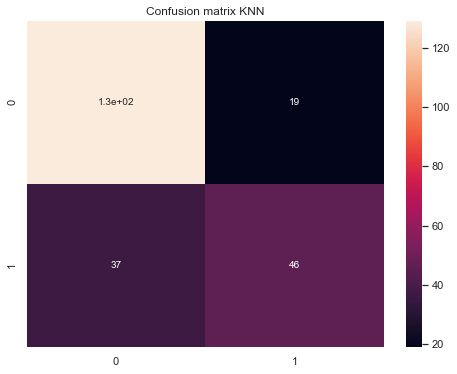

In [63]:
parameters = {'n_neighbors':np.arange(1,20,1), 'p' : np.arange(1,3,1)}
knn_scaled=KNeighborsClassifier()
clf = GridSearchCV(knn_scaled, parameters)
clf.fit(fv_train_scaled,etiq_train)
knn_scaled=KNeighborsClassifier(**clf.best_params_)
knn_scaled.fit(fv_train_scaled,etiq_train)

yknn_scaled=knn_scaled.predict(fv_test_scaled)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yknn_scaled))
print("F1-score KNN : ", metrics.f1_score(etiq_test, yknn_scaled, average='macro'))
print(metrics.classification_report(etiq_test, yknn_scaled))

plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yknn_scaled), annot=True, annot_kws={"size": 10})
plt.title('Confusion matrix KNN')

## SVM

Accuracy :  0.7489177489177489
F1-score SVM :  0.7116973661559649
              precision    recall  f1-score   support

           0       0.77      0.86      0.82       148
           1       0.69      0.54      0.61        83

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231



Text(0.5, 1.0, 'Confusion matrix SVM')

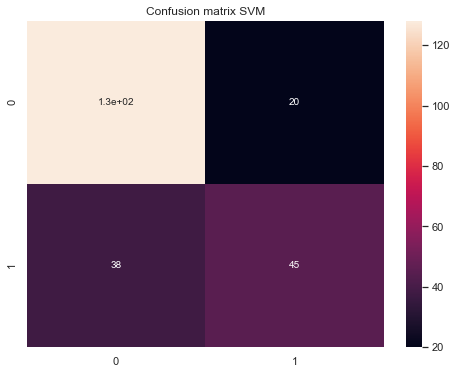

In [64]:
parameters = {'degree':np.arange(1,20,1)}
svm_scaled=SVC(gamma='scale', class_weight='balanced')
clf = GridSearchCV(svm_scaled, parameters)
clf.fit(fv_train_scaled,etiq_train)
svm_scaled=SVC(**clf.best_params_)
svm_scaled.fit(fv_train_scaled,etiq_train)
ysvm_scaled=svm_scaled.predict(fv_test_scaled)
print("Accuracy : ",metrics.accuracy_score(etiq_test, ysvm_scaled))
print("F1-score SVM : ",metrics.f1_score(etiq_test, ysvm_scaled, average='macro'))
print(metrics.classification_report(etiq_test, ysvm_scaled))

plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, ysvm_scaled), annot=True, annot_kws={"size": 10})
plt.title('Confusion matrix SVM')

# Data resampling
We see that we have relatively satisfactory results of about 75% but we will try to improve this result, which is the result of the imbalance between the two classes 

In [67]:
data_pima['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

We will then proceed to a resampling of our data, usually on a dataset with so few samples we would opt for an up-sampling of the minority class, but on this project we will try a down-sampling of the majority class and we will then show why it is not recommended. So at the beginning we have : 
- 0 : 500
- 1 : 268

After resampling we aim to have : 
- 0 : 370 
- 1 : 268

In [68]:
data_pima_resampling = data_pima.copy()
data_no = data_pima_resampling[data_pima_resampling["Outcome"]==0]
data_yes = data_pima_resampling[data_pima_resampling["Outcome"]==1]

In [69]:
data_no = resample(data_no, replace=True, n_samples=370,random_state=123)

In [70]:
data_pima_balanced = pd.concat([data_no, data_yes])
data_pima_balanced["Outcome"].value_counts()

0    370
1    268
Name: Outcome, dtype: int64

### Classification

In [71]:
features_pima_balanced = data_pima_balanced.copy()
etiq_balanced = features_pima_balanced['Outcome']
features_pima_balanced.drop(['Outcome'], inplace=True, axis = 1)

In [72]:
fv_train_balanced, fv_test_balanced, etiq_train_balanced, etiq_test_balanced = train_test_split(features_pima_balanced, etiq_balanced, test_size=0.3,random_state=23)

#### KNN and SVM

Accuracy KNN :  0.6927083333333334
F1-score KNN :  0.674847154051494
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       113
           1       0.65      0.56      0.60        79

    accuracy                           0.69       192
   macro avg       0.68      0.67      0.67       192
weighted avg       0.69      0.69      0.69       192

Accuracy SVM :  0.6458333333333334
F1-score SVM :  0.628034188034188
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       113
           1       0.58      0.52      0.55        79

    accuracy                           0.65       192
   macro avg       0.63      0.63      0.63       192
weighted avg       0.64      0.65      0.64       192



Text(0.5, 1.0, 'Confusion matrix SVM')

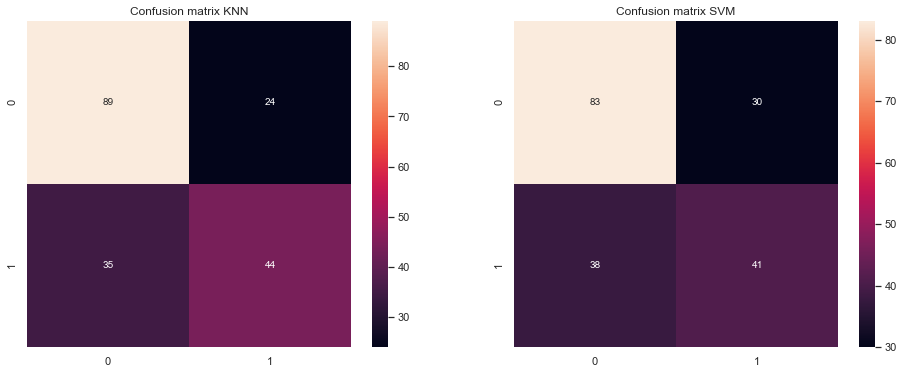

In [73]:
parameters = {'n_neighbors':np.arange(1,20,1), 'p' : np.arange(1,3,1)}
knn_balanced=KNeighborsClassifier()
clf = GridSearchCV(knn_balanced, parameters)
clf.fit(fv_train_balanced,etiq_train_balanced)
knn_balanced=KNeighborsClassifier(**clf.best_params_)
knn_balanced.fit(fv_train_balanced,etiq_train_balanced)

yknn_balanced=knn_balanced.predict(fv_test_balanced)
print("Accuracy KNN : ",metrics.accuracy_score(etiq_test_balanced, yknn_balanced))
print("F1-score KNN : ", metrics.f1_score(etiq_test_balanced, yknn_balanced, average='macro'))
print(metrics.classification_report(etiq_test_balanced, yknn_balanced))


parameters = {'degree':np.arange(1,20,1)}
svm_balanced=SVC(gamma='scale', class_weight='balanced')
clf = GridSearchCV(svm_balanced, parameters)
clf.fit(fv_train_balanced,etiq_train_balanced)
svm_balanced=SVC(**clf.best_params_)
svm_balanced.fit(fv_train_balanced,etiq_train_balanced)
ysvm_balanced=svm_balanced.predict(fv_test_balanced)
print("Accuracy SVM : ",metrics.accuracy_score(etiq_test_balanced, ysvm_balanced))
print("F1-score SVM : ",metrics.f1_score(etiq_test_balanced, ysvm_balanced, average='macro'))
print(metrics.classification_report(etiq_test_balanced, ysvm_balanced))

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(etiq_test_balanced, yknn_balanced), annot=True, annot_kws={"size": 10})
plt.title('Confusion matrix KNN')
plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(etiq_test_balanced, ysvm_balanced), annot=True, annot_kws={"size": 10})
plt.title('Confusion matrix SVM')

#### Random Forest

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       113
           1       0.67      0.70      0.68        79

    accuracy                           0.73       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.74      0.73      0.74       192

Accuracy :  0.734375
F1-score :  0.7272651310475449


Text(0.5, 1.0, 'Confusion matrix Random Forest')

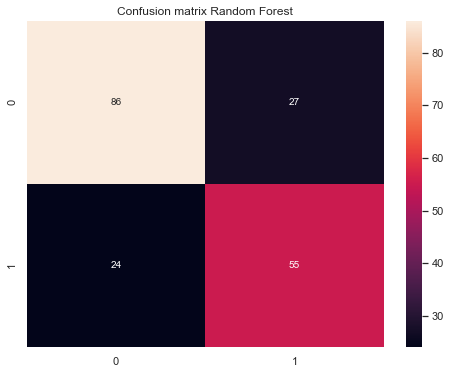

In [74]:
forrest_balanced = RandomForestClassifier(n_estimators = 700, max_features = 'sqrt', criterion = 'entropy', class_weight='balanced', random_state = 10).fit(fv_train_balanced,etiq_train_balanced)
yforrest_balanced = forrest_balanced.predict(fv_test_balanced)
print(metrics.classification_report(etiq_test_balanced,yforrest_balanced))

print("Accuracy : ",metrics.accuracy_score(etiq_test_balanced, yforrest_balanced))
print("F1-score : ",metrics.f1_score(etiq_test_balanced, yforrest_balanced, average='macro'))

plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test_balanced, yforrest_balanced), annot=True, annot_kws={"size": 10})
plt.title("Confusion matrix Random Forest")

We can see that such an operation has a negative effect on the results as expected, so now we will try an up-sampling of the minority class and thus we will have : 
at the beginning: 
- 0 : 500
- 1 : 268

After restructuring we aim to have : 
- 0 : 500 
- 1 : 500

In [76]:
data_pima_resampling = data_pima.copy()
data_no = data_pima_resampling[data_pima_resampling["Outcome"]==0]
data_yes = data_pima_resampling[data_pima_resampling["Outcome"]==1]

data_yes = resample(data_yes, replace=True, n_samples=500,random_state=123)

data_pima_balanced = pd.concat([data_no, data_yes])
data_pima_balanced["Outcome"].value_counts()

0    500
1    500
Name: Outcome, dtype: int64

In [77]:
features_pima_balanced = data_pima_balanced.copy()
etiq_balanced = features_pima_balanced['Outcome']
features_pima_balanced.drop(['Outcome'], inplace=True, axis = 1)

In [78]:
fv_train_balanced, fv_test_balanced, etiq_train_balanced, etiq_test_balanced = train_test_split(features_pima_balanced, etiq_balanced, test_size=0.3,random_state=23)

#### KNN and SVM

Accuracy KNN :  0.8566666666666667
F1-score KNN :  0.856588587119654
              precision    recall  f1-score   support

           0       0.91      0.81      0.85       155
           1       0.81      0.91      0.86       145

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300

Accuracy SVM :  0.76
F1-score SVM :  0.7593153859868069
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       155
           1       0.76      0.73      0.75       145

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



Text(0.5, 1.0, 'Confusion matrix SVM')

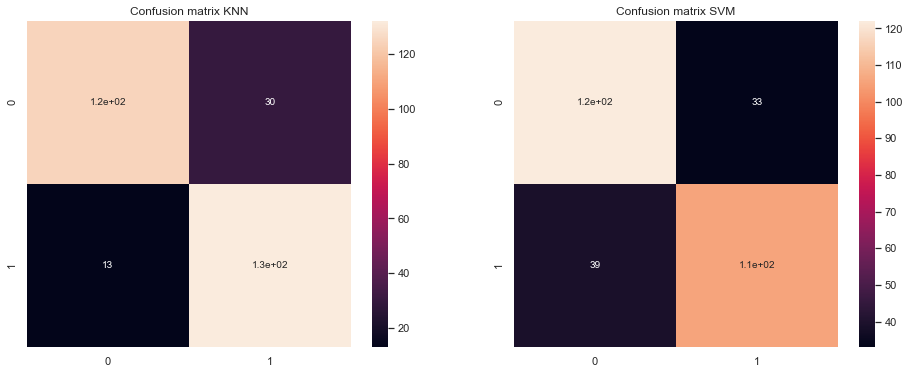

In [79]:
parameters = {'n_neighbors':np.arange(1,20,1), 'p' : np.arange(1,3,1)}
knn_balanced=KNeighborsClassifier()
clf = GridSearchCV(knn_balanced, parameters)
clf.fit(fv_train_balanced,etiq_train_balanced)
knn_balanced=KNeighborsClassifier(**clf.best_params_)
knn_balanced.fit(fv_train_balanced,etiq_train_balanced)

yknn_balanced=knn_balanced.predict(fv_test_balanced)
print("Accuracy KNN : ",metrics.accuracy_score(etiq_test_balanced, yknn_balanced))
print("F1-score KNN : ", metrics.f1_score(etiq_test_balanced, yknn_balanced, average='macro'))
print(metrics.classification_report(etiq_test_balanced, yknn_balanced))


parameters = {'degree':np.arange(1,20,1)}
svm_balanced=SVC(gamma='scale', class_weight='balanced')
clf = GridSearchCV(svm_balanced, parameters)
clf.fit(fv_train_balanced,etiq_train_balanced)
svm_balanced=SVC(**clf.best_params_)
svm_balanced.fit(fv_train_balanced,etiq_train_balanced)
ysvm_balanced=svm_balanced.predict(fv_test_balanced)
print("Accuracy SVM : ",metrics.accuracy_score(etiq_test_balanced, ysvm_balanced))
print("F1-score SVM : ",metrics.f1_score(etiq_test_balanced, ysvm_balanced, average='macro'))
print(metrics.classification_report(etiq_test_balanced, ysvm_balanced))

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(etiq_test_balanced, yknn_balanced), annot=True, annot_kws={"size": 10})
plt.title('Confusion matrix KNN')
plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(etiq_test_balanced, ysvm_balanced), annot=True, annot_kws={"size": 10})
plt.title('Confusion matrix SVM')

#### Random Forest

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       155
           1       0.84      0.93      0.88       145

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

Accuracy :  0.88
F1-score :  0.879951980792317


Text(0.5, 1.0, 'Confusion matrix Random Forest')

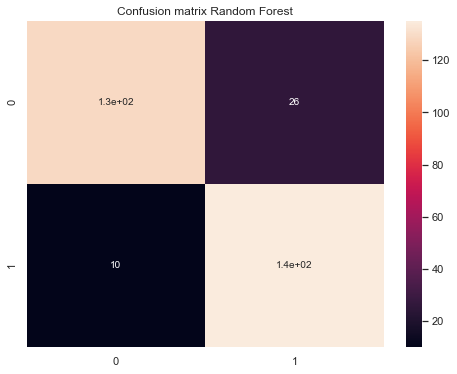

In [80]:
forrest_balanced = RandomForestClassifier(n_estimators = 700, max_features = 'sqrt', criterion = 'entropy', class_weight='balanced', random_state = 10).fit(fv_train_balanced,etiq_train_balanced)
yforrest_balanced = forrest_balanced.predict(fv_test_balanced)
print(metrics.classification_report(etiq_test_balanced,yforrest_balanced))

print("Accuracy : ",metrics.accuracy_score(etiq_test_balanced, yforrest_balanced))
print("F1-score : ",metrics.f1_score(etiq_test_balanced, yforrest_balanced, average='macro'))

plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test_balanced, yforrest_balanced), annot=True, annot_kws={"size": 10})
plt.title("Confusion matrix Random Forest")

#### Naive Bayes

Taux de précision lors des tests :  0.7566666666666667
F1-score :  0.7554684621311091


Text(0.5, 1.0, 'Confusion matrix Naive Bayes')

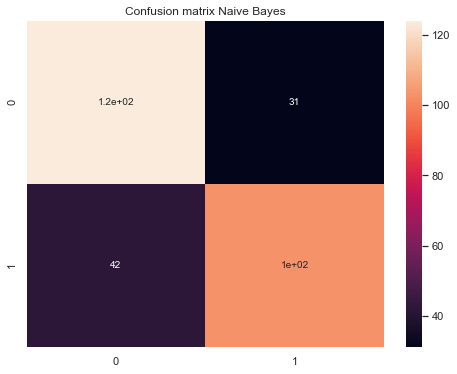

In [81]:
gaussNaive_balanced = GaussianNB().fit(fv_train_balanced,etiq_train_balanced)
ygaussNaive_balanced = gaussNaive_balanced.predict(fv_test_balanced)
print("Taux de précision lors des tests : ",metrics.accuracy_score(etiq_test_balanced, ygaussNaive_balanced))
print("F1-score : ",metrics.f1_score(etiq_test_balanced, ygaussNaive_balanced, average='macro'))

plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test_balanced, ygaussNaive_balanced), annot=True, annot_kws={"size": 10})
plt.title("Confusion matrix Naive Bayes")

#### Extremely randomized tree

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       155
           1       0.93      0.84      0.88       145

    accuracy                           0.89       300
   macro avg       0.90      0.89      0.89       300
weighted avg       0.90      0.89      0.89       300

Accuracy :  0.8933333333333333
F1-score :  0.8926462694578636


Text(0.5, 1.0, 'Confusion matrix Extremely randomized tree')

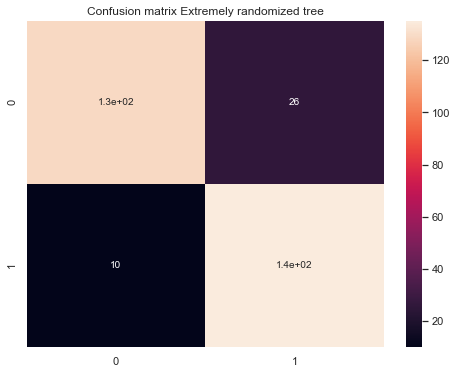

In [82]:
extra_balanced = ExtraTreesClassifier(n_estimators=700, criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0).fit(fv_train,etiq_train)

yextra_balanced = extra_balanced.predict(fv_test_balanced)
print(metrics.classification_report(etiq_test_balanced,yextra_balanced))

print("Accuracy : ",metrics.accuracy_score(etiq_test_balanced, yextra_balanced))
print("F1-score : ",metrics.f1_score(etiq_test_balanced, yextra_balanced, average='macro'))

plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test_balanced, yforrest_balanced), annot=True, annot_kws={"size": 10})
plt.title("Confusion matrix Extremely randomized tree")